In [10]:
# Helper libraries
import matplotlib
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2 as cv
from tqdm import tqdm
import IPython
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
import os

import glob
import pandas as pd
import random
from colour.plotting import *

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import data_utils as data_utils
import tqdm


In [5]:
csv_path = '../data/trailers.csv'
metadata_path = '../data/movie_details.json'

metadata = data_utils.load_json(metadata_path, csv_path)
print(len(metadata))

Column names are , tmdb_id, tmdb_title, trailer_title, trailer_youtube_key
1187


In [6]:
gg = metadata['278'].keys()
print(gg)
# for g in gg:
#     print(g['name'])

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'yt_filename'])


### Color Clustering on Genres

In [4]:
# Obtain all genres in the dataset, and associated trailor file names
all_genres = dict()
for vid_key in metadata.keys():
    genres =  metadata[vid_key]['genres']
    for genre in genres:
        if genre['name'] not in all_genres.keys():
            all_genres[genre['name']] = [metadata[vid_key]['yt_filename']]
        else:
            all_genres[genre['name']].append(metadata[vid_key]['yt_filename'])
print('All genres in this dataset: ', all_genres.keys())

All genres in this dataset:  dict_keys(['Drama', 'Crime', 'History', 'War', 'Romance', 'Animation', 'Family', 'Fantasy', 'Thriller', 'Comedy', 'Action', 'Adventure', 'Science Fiction', 'Horror', 'Western', 'Music', 'Mystery', 'TV Movie'])


In [108]:
print(len(all_genres['Fantasy']))

234


In [3]:
to_remove = []
for vid_key in metadata.keys():
    vid_genres = [g['name'] for g in metadata[vid_key]['genres']]
    if 'Animation' in vid_genres and vid_genres[0] != 'Animation':
        search_str = './{}/{}'.format(vid_genres[0], metadata[vid_key]['yt_filename'])
        to_remove.append(search_str)
print(len(to_remove))

NameError: name 'metadata' is not defined

In [1342]:
text_path = 'train.txt'
new_text_path = 'train_noanim.txt'
with open(text_path) as f:
    with open(new_text_path, 'w+') as f2:
        for line in f:
            first = line.split(',')[0]
            idx = first.rfind('/') + 12
            search_str = first[:idx]
            if search_str not in to_remove:
                f2.write(line)
            else:
                print(search_str)

./Action/tg52up16eq0
./Action/sJCjKQQOqT0
./Action/jN4mg2rESLU
./Action/_qApXdc1WPY
./Action/x6WRXAJ4jC0
./Action/i5qOzqD9Rms
./Family/H0MoWlLPLAM
./Family/87E6N7ToCxs
./Family/4sj1MT05lAA
./Family/T73h5bmD8Dc
./Family/eqa5NqcH2og
./Family/ker49kN5Agk
./Family/FFGaS6MDknY
./Fantasy/InR865IDDjU
./Fantasy/Du4jTG7-93k
./Fantasy/1huZhKwhIQc
./Fantasy/iwROgK94zcM
./Fantasy/PK0xIcWlz9Q
./Fantasy/CfsyUyi_FJM
./Romance/6vfCFxwa2kE
./Comedy/Jb0hEE9yAbU
./Comedy/BE77igZczlI


### Visualizing some frames in a particular genre

NameError: name 'io' is not defined

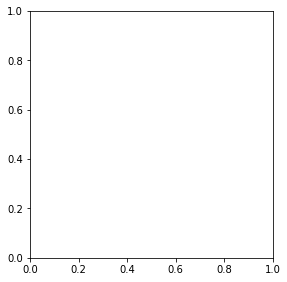

In [11]:

filenames = glob.glob('./casual/*.jpg')
filenames = np.random.permutation(filenames)

plt.figure(figsize=(20,10))
st = 0
for i in range(2):
    for j in range(4):
        plt.subplot(2, 4, i*4+j+1)
        image = io.imread(filenames[st])
        while rgb.mean() < 5:
            image = io.imread(filenames[st])
            st += 1
        print(image.mean(), image[:,:,0].mean())
        plt.imshow(image)
        plt.axis('off')
        st += 1
plt.show()


In [21]:
import data_utils as data_utils

filenames = glob.glob('./casual/*.jpg')
filenames = np.random.permutation(filenames)

for id, file in enumerate(filenames[:30]):
    image = np.array(Image.open(file))
    print(image.shape)
    image = data_utils.resize_pil(image, 1./96)
    image = Image.fromarray(image).resize((128, 64), Image.NEAREST)
    image.save('./temp/%02d.png'%(id))

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)


100%|██████████| 1338/1338 [11:19<00:00,  1.97it/s]

(51,) 17068634.0


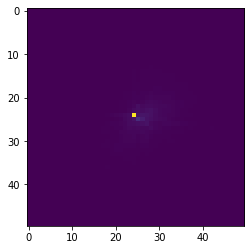

In [178]:
import tqdm
from skimage import io, color
from skimage.transform import rescale, resize
import glob
import numpy as np
import matplotlib.pyplot as plt
filenames = glob.glob('./War/*.jpg')
all_hist = 0
for filename in tqdm.tqdm(filenames[:1000]):
#     print(filename)
    bin_res = (50,50)
    rgb = data_utils.crop_blacks(io.imread(filename))
    if rgb.mean() < 5:  # get rid of the black frames that occasionally occurs in trailers
        continue
    rgb_rsz = resize(rgb, (rgb.shape[0] // 4, rgb.shape[1] // 4), anti_aliasing=True)
    rgb_rsz = np.reshape(rgb_rsz, (-1, 3))
    rgb_uv = rgb_rsz[:,:2]
    rgb_uv[:,0] = np.log(rgb_rsz[:,1]/(rgb_rsz[:,0]+1e-6)+1e-6)
    rgb_uv[:,1] = np.log(rgb_rsz[:,1]/(rgb_rsz[:,2]+1e-6)+1e-6)
#     print(rgb_uv)
    hist, edges = np.histogramdd(rgb_uv, bins=bin_res
                                 , range=[[-1,1],[-1,1]])
    if not np.isnan(hist.max()):
        all_hist += hist

print(edges[0].shape, all_hist.max())
plt.imshow(np.uint8(255/all_hist.max() * all_hist))
plt.show()

(2600, 2600, 3)
1.02721660532


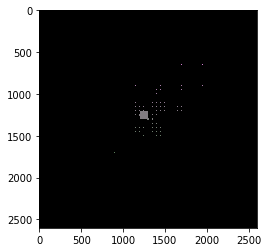

In [152]:
hist_cum = all_hist

max_grid = 50
hist_norm = hist_cum.max()/max_grid
hist_cum /= hist_norm
grid = np.zeros(((bin_res[0] + 2) * max_grid, (bin_res[1] + 2) * max_grid, 3))
print(grid.shape)
lum = 5
for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        grid_sz = int(np.floor(hist_cum[i, j]))
#         print(grid_sz)
        if grid_sz != 0:
            lab_ij = np.zeros((1, 1, 3))
            lab_ij[0, 0, 0] = 0.5 / np.exp(edges[0][i])
            lab_ij[0, 0, 1] = 0.5
            lab_ij[0, 0, 2] = 0.5 / np.exp(edges[1][i])
#             print(lab_ij)
            grid[(i + 1) * 50 - grid_sz:(i + 1) * 50 + grid_sz, (j + 1) * 50 - grid_sz:(j + 1) * 50 + grid_sz, :] = np.tile(lab_ij, (grid_sz*2, grid_sz*2, 1))
print(grid.max())
plt.imshow(np.uint8(255 / grid.max() * grid))
plt.show()


43613.9048
17068634.0
0.0342528947645
0.355142428611
0.0


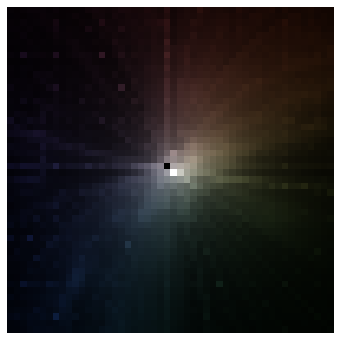

In [181]:
# all_hist_vis = all_hist / all_hist.max()
# all_hist_vis = np.sqrt(all_hist)
all_hist_vis = all_hist.copy()
print(all_hist.mean())
print(all_hist.max())
all_hist_vis = np.sqrt(all_hist / all_hist.max())
# all_hist_vis[all_hist > 100] = 100

hist_vis = np.zeros((hist.shape[0], hist.shape[1], 3))
for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        if i==bin_res[0]/2 - 1 and j==bin_res[1]/2 - 1:
            continue
        green = all_hist_vis[i, j] 
        red = green / np.exp(edges[0][i])
        blue = green / np.exp(edges[1][j])
#         print(red)
        hist_vis[i, j, 0] = red
        hist_vis[i, j, 1] = green
        hist_vis[i, j, 2] = blue

print(hist_vis.mean())
print(hist_vis.max())
print(hist_vis.min())
plt.figure(figsize=(6,6))
hist_vis = np.clip(hist_vis, 0, 1)
hist_vis = np.uint8(255*hist_vis/hist_vis.max())
plt.imshow(hist_vis)
plt.axis('off')
plt.show()

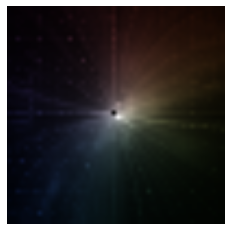

In [189]:
filt_hist_vis = resize(hist_vis, (hist_vis.shape[0] * 16, hist_vis.shape[1] * 16), anti_aliasing=True)
# filt_hist_vis = cv2.bilateralFilter(filt_hist_vis, 9, 75, 75)
plt.imsave('war_hist.jpg', filt_hist_vis)
plt.imshow(filt_hist_vis)
plt.axis('off')
plt.show()

### War visualization

1.3888888888888884


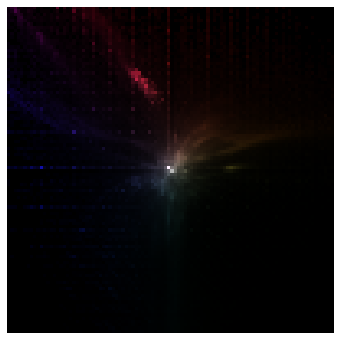

In [35]:
# all_hist_vis = all_hist / all_hist.max()
# all_hist_vis = np.sqrt(all_hist)
all_hist_vis = all_hist.copy()
print(all_hist.mean())
all_hist_vis = np.sqrt(all_hist)
# all_hist_vis[all_hist > 100] = 100

hist_vis = np.zeros((hist.shape[0], hist.shape[1], 3))
for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        green = all_hist_vis[i, j]  # + .01
        red = green / np.exp(edges[0][i])
        blue = green / np.exp(edges[1][j])
#         print(red)
        hist_vis[i, j, 0] = red
        hist_vis[i, j, 1] = green
        hist_vis[i, j, 2] = blue

plt.figure(figsize=(6,6))
plt.imshow(np.uint8(255 / hist_vis.max() * hist_vis))
plt.axis('off')
plt.show()

### Log space Chroma Visualization

(50, 50, 3)
0.543656365692


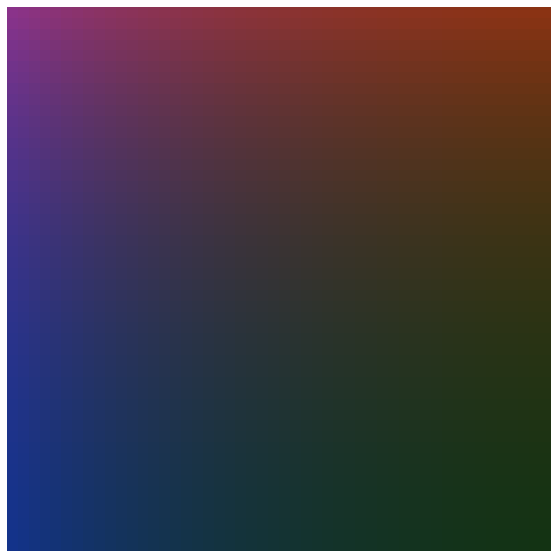

In [649]:
hist /= hist.max()
hist_vis = np.zeros((hist.shape[0], hist.shape[1], 3))
print(hist_vis.shape)
for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        green = 0.2
        red = green / np.exp(edges[0][i])
        blue = green / np.exp(edges[0][j])
#         print(red)
        hist_vis[i, j, 0] = red
        hist_vis[i, j, 1] = green
        hist_vis[i, j, 2] = blue
print(hist_vis.max())
plt.figure(figsize=(10,10))
plt.imshow(np.uint8(255 * hist_vis))
plt.axis('off')
plt.show()

In [2]:
# Visualize color distribution per genre
import data_utils
import importlib
importlib.reload(data_utils)
# for genre in all_genres.keys():
# genre == 'History':
# all_frames_vis = dict()
# for video_path in all_genres[genre]:
#     video_filename = os.path.join('/home/bmild/comp-color/data', video_path + '.mp4')
#     print('Processing %s in %s'%(video_filename, genre))
#     frames_vis = data_utils.extract_every_n_frames(video_filename, frames_dir_path=genre, n=60)
#     all_frames_vis[video_path] = frames_vis
# all_frames_vis_history = all_frames_vis
# genre = 'Comedy'
# all_frames_vis = dict()
# for video_path in tqdm.tqdm(all_genres[genre]):
#     video_filename = os.path.join('/home/bmild/comp-color/data', video_path + '.mp4')
#     print('Processing %s in %s'%(video_filename, genre))
video_filename = '/home/bmild/comp-color/data/casual/FZ7wBmLvcSA.mp4'
frames_vis = data_utils.extract_every_n_frames(video_filename, frames_dir_path='casual', n=10)
# all_frames_vis[video_path] = frames_vis
# all_frames_vis_fantasy = all_frames_vis
# genre = 'Family'
# all_frames_vis = dict()
# for video_path in all_genres[genre]:
#     video_filename = os.path.join('/home/bmild/comp-color/data', video_path + '.mp4')
#     print('Processing %s in %s'%(video_filename, genre))
#     frames_vis = data_utils.extract_every_n_frames(video_filename, frames_dir_path=genre, n=60)
#     all_frames_vis[video_path] = frames_vis
# all_frames_vis_thriller = all_frames_vis

KeyboardInterrupt: 

./Romance/2PpgPxjzbkA_3540.jpg


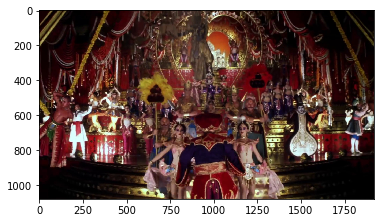

In [230]:
filename = random.choice(glob.glob('./Romance/*.jpg'))
print(filename)
# rgb = io.imread('./Fantasy/n44EWI92Tc8_2160.jpg')
rgb = io.imread(filename)
rgb = data_utils.crop_blacks(rgb)
plt.imshow(rgb)

[[ 8.96739419 -1.2527959   0.02745098]
 [ 8.96739419 -1.2527959   0.02745098]
 [ 8.96739419 -1.2527959   0.02745098]
 ..., 
 [-0.09533226 -0.40548061  0.05882353]
 [-0.09533226 -0.40548061  0.05882353]
 [-0.09533226 -0.40548061  0.05882353]]


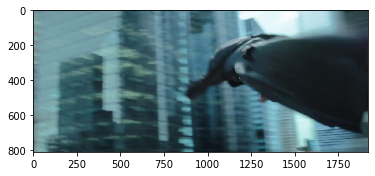

In [121]:
# rgb = cv.bilateralFilter(rgb, 20, 150, 150)
rgb_rsz = resize(rgb, (rgb.shape[0], rgb.shape[1]), anti_aliasing=True)
plt.imshow(rgb_rsz)
# rgb_lum = np.square(rgb_rsz)
# rgb_lum = np.sqrt(rgb_lum[:,:,0] + rgb_lum[:,:,1] + rgb_lum[:,:,2])
# rgb_rsz = np.multiply(rgb_rsz, np.dstack([rgb_lum, rgb_lum, rgb_lum]))
rgb_rsz_resh = np.reshape(rgb_rsz, (-1, 3))
rgb_uv = rgb_rsz_resh[:,:2]
# print(rgb_rsz_resh)
rgb_uv[:,0] = np.log(rgb_rsz_resh[:,1]/(rgb_rsz_resh[:,0]+1e-6)+1e-6)
rgb_uv[:,1] = np.log(rgb_rsz_resh[:,1]/(rgb_rsz_resh[:,2]+1e-6)+1e-6)
print(rgb_rsz_resh)
# plt.imshow(rgb_rsz)

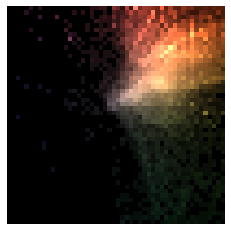

In [147]:
# print(rgb_uv)
bin_res = (50, 50)
# rgb_uv /= rgb_uv.max()
hist, edges = np.histogramdd(rgb_uv, bins=bin_res, range=[[-1,1],[-1,1]], density=False)

# print(np.unique(hist))
# print(edges[0])
hist /= hist.max()
hist = np.sqrt(hist)

# hist = cv.bilateralFilter(np.float32(hist), 5, 5, 5)


# hist /= np.linalg.norm(hist, ord=1)
# hist = np.sqrt(hist)
# print(np.unique(hist))
hist_vis = np.zeros((hist.shape[0], hist.shape[1], 3))

rgb_vis = np.zeros((hist.shape[0], hist.shape[1], 3))

for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        green = hist[i,j]
        red = green / np.exp(edges[0][i]) 
        blue = green / np.exp(edges[1][j])
#         print(red)
        hist_vis[i, j, 0] = red
        hist_vis[i, j, 1] = green
        hist_vis[i, j, 2] = blue

hist_vis = np.clip(hist_vis,0,1)
hist_vis *= 255
hist_vis = np.uint8(hist_vis)
# print(hist_vis[0])


plt.figure(figsize=(4, 4))
plt.imshow(hist_vis)
plt.axis('off')
plt.show()



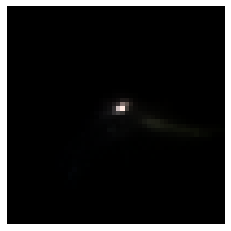

In [996]:
bin_res = (50, 50)

rgb_rsz = resize(rgb, (rgb.shape[0]//4, rgb.shape[1]//4), anti_aliasing=True)
rgb_rsz = np.reshape(rgb_rsz, (-1, 3))
rgb_uv = rgb_rsz[:,:2]
rgb_uv[:,0] = np.log(rgb_rsz[:,1]/(rgb_rsz[:,0]+1e-6)+1e-6)
rgb_uv[:,1] = np.log(rgb_rsz[:,1]/(rgb_rsz[:,2]+1e-6)+1e-6)


hist, edges = np.histogramdd(rgb_uv, bins=bin_res, range=[[-1,1],[-1,1]], normed=True)

hist /= hist.max()
hist_vis = np.zeros((hist.shape[0], hist.shape[1], 3))
# print(hist.shape)
# print(hist[10])
for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        green = hist[i,j]
        red = green / np.exp(edges[0][i])
        blue = green / np.exp(edges[1][j])
#         print(red)
#         lum = np.sqrt(green**2 + red**2 + blue**2)
        hist_vis[i, j, 0] = red
        hist_vis[i, j, 1] = green
        hist_vis[i, j, 2] = blue
# print(hist_vis.max())
# print(hist_vis[0])
# print(edges)

hist_vis /= hist_vis.max()
# print(hist_vis[0])

# hist_vis = np.clip(hist_vis, 0, 1)

hist_vis *= 255
hist_vis = np.uint8(hist_vis)
# print(hist_vis[0])
plt.figure(figsize=(4,4))
plt.imshow(hist_vis)
plt.axis('off')
plt.show()

## Parallel template

In [ ]:
import multiprocessing

def align(str):
    return

objPool = multiprocessing.Pool(8)
objPool.map_async(align, sorted(glob.glob('./*.jpg')))
objPool.close()
objPool.join()

## Chroma Histogram by Video

100%|██████████| 47/47 [00:30<00:00,  1.53it/s]


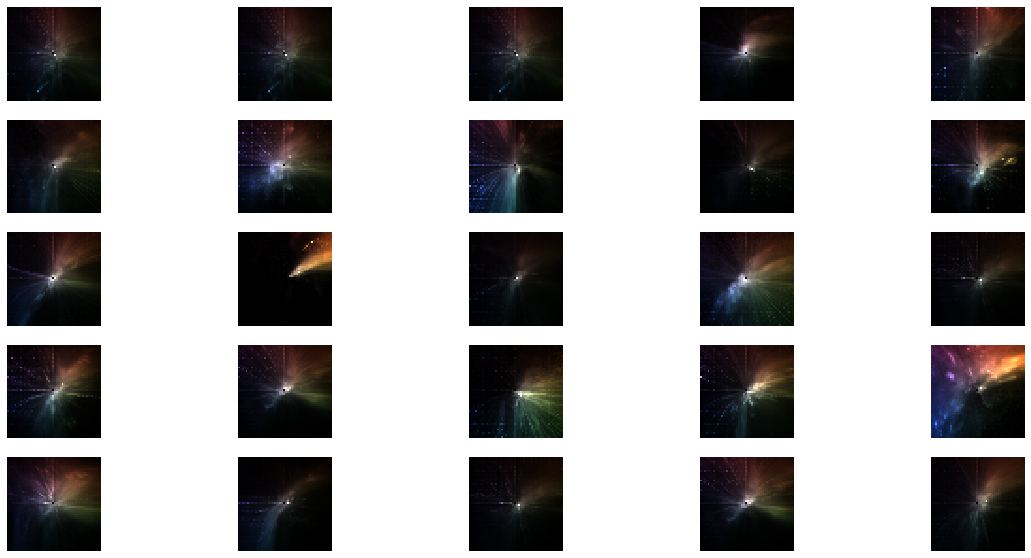

In [203]:
import importlib
importlib.reload(data_utils)
genre = 'Romance'
videos_in_genre = glob.glob('./{}/*_360.jpg'.format(genre))
videos_in_genre = [v[:-7] for v in videos_in_genre]

plt.figure(figsize=(20,10))

for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, i*5+j+1)
        vid = random.choice(videos_in_genre)
        frames = glob.glob(vid+'*.jpg')
        all_hist, bin_res, edges = data_utils.chroma_histogram(frames)
        hist_vis = data_utils.vis_chroma_histogram(all_hist, bin_res, edges)
        plt.imsave(genre+str(i*5+j+1)+'.jpg', hist_vis)
        plt.imshow(hist_vis)
        plt.axis('off')
plt.show()

100%|██████████| 3/3 [00:02<00:00,  1.04it/s]


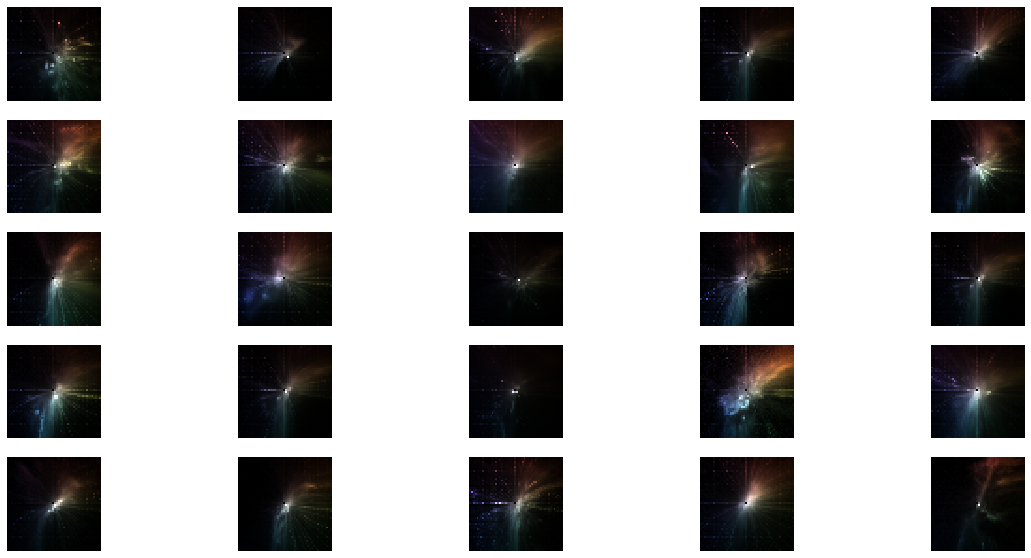

In [202]:
genre = 'Thriller'
videos_in_genre = glob.glob('./{}/*_360.jpg'.format(genre))
videos_in_genre = [v[:-7] for v in videos_in_genre]

plt.figure(figsize=(20,10))

for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, i*5+j+1)
        vid = random.choice(videos_in_genre)
        frames = glob.glob(vid+'*.jpg')
        all_hist, bin_res, edges = data_utils.chroma_histogram(frames)
        hist_vis = data_utils.vis_chroma_histogram(all_hist, bin_res, edges)
        plt.imsave(genre+str(i*5+j+1)+'.jpg', hist_vis)
        plt.imshow(hist_vis)
        plt.axis('off')
plt.show()

100%|██████████| 18/18 [00:13<00:00,  1.38it/s]


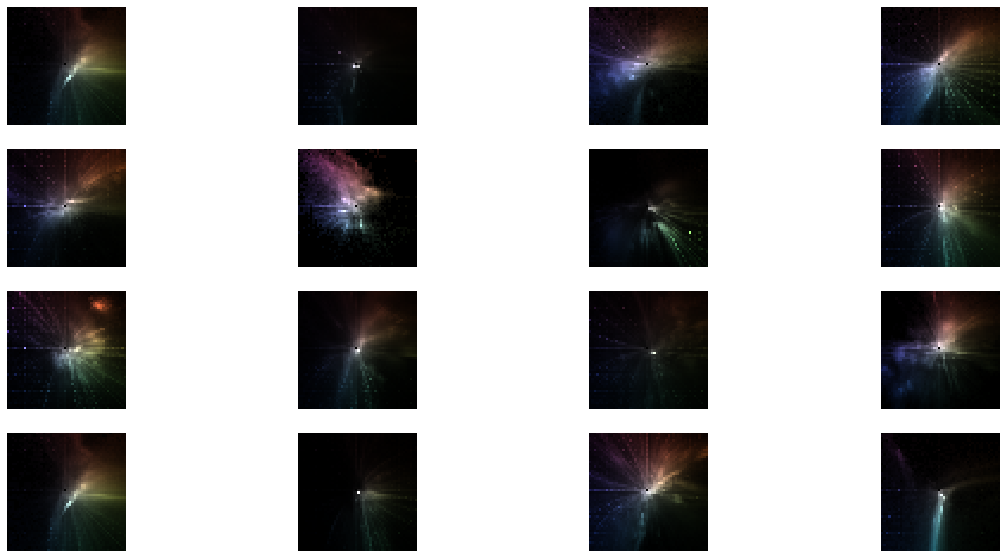

In [201]:
genre = 'Horror'
videos_in_genre = glob.glob('./{}/*_360.jpg'.format(genre))
videos_in_genre = [v[:-7] for v in videos_in_genre]

plt.figure(figsize=(20,10))

for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        vid = random.choice(videos_in_genre)
#         print(vid)
        frames = glob.glob(vid+'*.jpg')
        all_hist, bin_res, edges = data_utils.chroma_histogram(frames)
        hist_vis = data_utils.vis_chroma_histogram(all_hist, bin_res, edges)
        plt.imsave(genre+str(i*4+j+1)+'.jpg', hist_vis)
        plt.imshow(hist_vis)
        plt.axis('off')
plt.show()

100%|██████████| 36/36 [00:24<00:00,  1.47it/s]


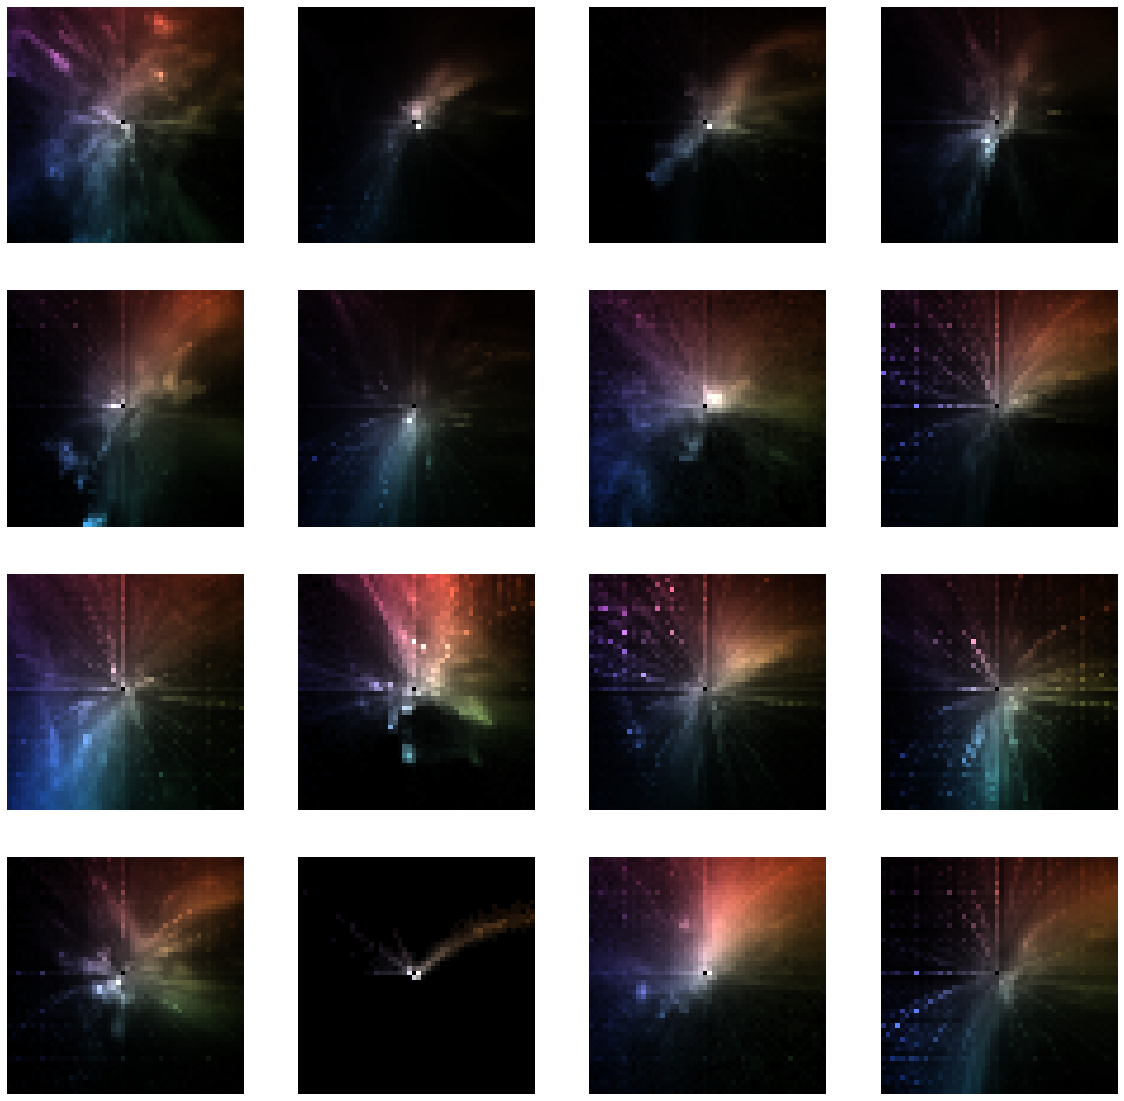

In [199]:
genre = 'Fantasy'
videos_in_genre = glob.glob('./{}/*_360.jpg'.format(genre))
videos_in_genre = [v[:-7] for v in videos_in_genre]

plt.figure(figsize=(20,20))

for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        vid = random.choice(videos_in_genre)
        frames = glob.glob(vid+'*.jpg')
        all_hist, bin_res, edges = data_utils.chroma_histogram(frames)
        hist_vis = data_utils.vis_chroma_histogram(all_hist, bin_res, edges)
        plt.imsave(genre+str(i*4+j+1)+'.jpg', hist_vis)
        plt.imshow(hist_vis)
        plt.axis('off')
plt.show()

## LAB Histograms

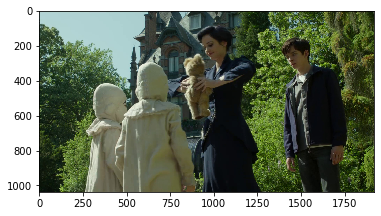

In [190]:
from skimage import color, io
genre = 'Fantasy'
frames = glob.glob('./{}/*jpg'.format(genre))
img = np.asarray(io.imread(random.choice(frames)), dtype=np.float32)
img = data_utils.crop_blacks(img)
plt.imshow(img/255)

[  0.00000000e+00   3.95736550e-04   7.91473101e-04 ...,   9.94408689e-01
   9.94664295e-01   9.95135514e-01]
[ 0.25882008  0.26122377  0.26147071 ...,  0.60189759  0.60626992
  0.60807316]
[ 0.25882008  0.26122377  0.26147071 ...,  0.60189759  0.60626992
  0.60807316]


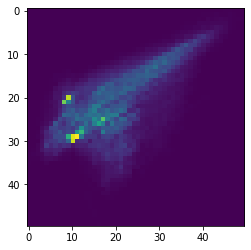

In [191]:
image_LAB = color.rgb2lab(img/255)
image_LAB = image_LAB.reshape((-1,3))
# print(image_LAB[:,1])


# Scale l to [0, 1]
avg_L = image_LAB[:,0].mean()
image_LAB[:,0] /= 100.0
print(np.unique(image_LAB[:,0]))


# Scale a to [0, 1]
image_LAB[:,1] = (image_LAB[:,1] + 86.181244) / 184.416414
print(np.unique(image_LAB[:,1]))


# Scale b to [0, 1]
image_LAB[:,2] = (image_LAB[:,2] + 107.86175) / 202.33753
# image_LAB = image_LAB[image_LAB[:,0]==np.unique(image_LAB[:,0])[2]]
print(np.unique(image_LAB[:,1]))
# print(image_LAB[:,0].shape)
# print(image_LAB[:,1])


bin_res = (50,50)
hist, edges = np.histogramdd(image_LAB[:,1:], bins=bin_res)

hist = np.sqrt(hist/hist.max())
# vis_hist = data_utils.vis_chroma_histogram(hist, bin_res, edges)
plt.imshow(hist)

32.9263725863


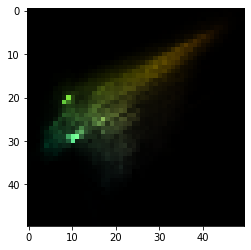

In [192]:
for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        l = avg_L
        a = edges[0][i]
        b = edges[1][j]
#         print(red)
#         lum = np.sqrt(green**2 + red**2 + blue**2)
        hist_vis[bin_res[0] - 1 - j, i, 0] = l
        hist_vis[bin_res[0] - 1 - j, i, 1] = a
        hist_vis[bin_res[0] - 1 - j, i, 2] = b
        
hist_vis[:,:, 1] = hist_vis[:,:, 1] * 184.416414 - 86.181244
hist_vis[:,:, 2] = hist_vis[:,:, 2] * 202.33753 - 107.86175
hist_vis = color.lab2rgb(hist_vis)

for i in range(bin_res[0]):
    for j in range(bin_res[1]):
        hist_vis[i,j,:] *= hist[i,j]

print(avg_L)
plt.imshow(hist_vis/hist_vis.max())

## LAB Visualization

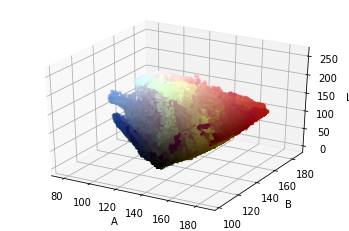

In [231]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image_BGR = np.uint8(np.random.rand(50,50,3) * 255)
#this image above is just an example. To load a real image use the line below
#image_BGR = cv2.imread('path/to/image')

def toLAB(image, input_type = 'BGR'):
  conversion = cv2.COLOR_BGR2LAB if input_type == 'BGR' else cv2.COLOR_RGB2LAB
  image_LAB = cv2.cvtColor(image, conversion)

  y,x,z = image_LAB.shape
  LAB_flat = np.reshape(image_LAB, [y*x,z])

  colors = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if input_type == 'BGR' else image
  colors = np.reshape(colors, [y*x,z])/255.

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xs=LAB_flat[:,2], ys=LAB_flat[:,1], zs=LAB_flat[:,0], s=10,  c=colors, lw=0)
  ax.set_xlabel('A')
  ax.set_ylabel('B')
  ax.set_zlabel('L')

  plt.show()

  return image_LAB 

lab_image = toLAB(rgb, input_type='RGB')